## Problem Statement
You work for the LendingClub company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate) Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Business Objectives LendingClub is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA and machine learning is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

Dataset contains the full LendingClub data available from their site. There are separate files for accepted and rejected loans. The accepted loans also include the FICO scores, which can only be downloaded when you are signed in to LendingClub and download the data.



In [ ]:
import sklearn
import re
import os

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 200

# Visualization 
import matplotlib.pyplot as plt
import missingno
%matplotlib inline 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Internships/ZestAI/")

In [ ]:
!ls

archive.zip  data  Untitled.ipynb


### 1. Loading the data into a dataframe

In [2]:
accepted_file = "./data/accepted_2007_to_2018Q4.csv.gz"
rejected_file = "./data/rejected_2007_to_2018Q4.csv.gz"


In [ ]:
accepted = pd.read_csv(accepted_file)
rejected = pd.read_csv(rejected_file)

In [ ]:
print(accepted.shape)
print(rejected.shape)

(2260701, 151)
(27648741, 9)


In [ ]:
# print(accepted.head(10))
# print(rejected.head(10))

In [ ]:
print(accepted.info())
print(rejected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB
None


Added to print all the columns and get the relevant information from these columns.

In [ ]:
# # TO get the column names uncomment the whole block
# for col in accepted.columns: 
#   print(col)

In [ ]:
# accepted.info()
# for col in accepted.columns: 
#   if isinstance(col, int): 
#     print(col)

Here, we describe the data with a statistical approach in mind

In [ ]:
# # To get the statistical description column-wise for both the dataset, 
# # uncomment this block 
# print(accepted.describe())
# print(rejected.describe())

In [ ]:
# print(accepted.info())

### 2. Feature Selection

Due to the large volume of data in the accepted_2007_to_2018Q4.csv.gz, of aroud - (2260701, 151). I would be selectively choosing the columns based on the relevance of the assignment for these columns.



In [ ]:
accepted_short = accepted[["loan_amnt", "term", "int_rate", "installment", "grade", "sub_grade", "emp_title",
                           "emp_length", "home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status",
                           "purpose", "title", "dti", "earliest_cr_line", "open_acc", "pub_rec", "revol_bal", "revol_util",
                           "total_acc", "initial_list_status", "application_type", "mort_acc", "mths_since_recent_inq",
                           "num_il_tl", "pub_rec_bankruptcies", "bc_open_to_buy", "bc_util", "num_op_rev_tl"]]

In [ ]:
accepted_short

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,mths_since_recent_inq,num_il_tl,pub_rec_bankruptcies,bc_open_to_buy,bc_util,num_op_rev_tl
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,4.0,3.0,0.0,1506.0,37.2,4.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,6.0,0.0,57830.0,27.1,20.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,10.0,6.0,0.0,2737.0,55.9,4.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,17.06,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,NaN,2.0,0.0,54962.0,12.1,10.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,1.0,10.0,0.0,4567.0,77.5,7.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,10.20,Oct-1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,NaN,2.0,0.0,844.0,91.0,4.0
6,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,14.67,Jun-1990,12.0,0.0,87329.0,84.5,27.0,f,Individual,4.0,10.0,7.0,0.0,0.0,102.9,9.0
7,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,17.61,Feb-1999,8.0,0.0,826.0,5.7,15.0,w,Individual,3.0,8.0,9.0,0.0,13674.0,5.7,3.0
8,10000.0,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,85000.0,Not Verified,Dec-2015,Fully Paid,credit_card,Credit card refinancing,13.07,Apr-2002,14.0,1.0,10464.0,34.5,23.0,w,Individual,1.0,1.0,3.0,1.0,8182.0,50.1,13.0
9,8000.0,36 months,11.48,263.74,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.0,Not Verified,Dec-2015,Fully Paid,credit_card,Credit card refinancing,34.80,Nov-1994,8.0,0.0,7034.0,39.1,18.0,w,Individual,1.0,10.0,5.0,0.0,9966.0,41.4,5.0


In [ ]:
accepted_short.shape

(2260701, 31)

In [ ]:
accepted_short.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,mths_since_recent_inq,num_il_tl,pub_rec_bankruptcies,bc_open_to_buy,bc_util,num_op_rev_tl
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.210638e+06,1.965233e+06,2.190392e+06,2.259303e+06,2.185733e+06,2.184597e+06,2.190392e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,1.555382e+00,7.024194e+00,8.413439e+00,1.281935e-01,1.139426e+04,5.789995e+01,8.246523e+00
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,1.904981e+00,5.965411e+00,7.359114e+00,3.646130e-01,1.659953e+04,2.858347e+01,4.683928e+00
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,8.000000e+00,0.000000e+00,5.950000e+03,3.150000e+01,1.500000e+01,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,1.722000e+03,3.540000e+01,5.000000e+00
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,1.100000e+01,0.000000e+00,1.132400e+04,5.030000e+01,2.200000e+01,1.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,5.442000e+03,6.020000e+01,7.000000e+00
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,1.400000e+01,0.000000e+00,2.024600e+04,6.940000e+01,3.100000e+01,3.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.418700e+04,8.310000e+01,1.000000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,1.010000e+02,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,9.400000e+01,2.500000e+01,1.590000e+02,1.200000e+01,7.111400e+05,3.396000e+02,9.100000e+01


#### 2.1 Plotting Missing Values on Missing Value Plots
The plot given below give an overview of the columns and their missing data.

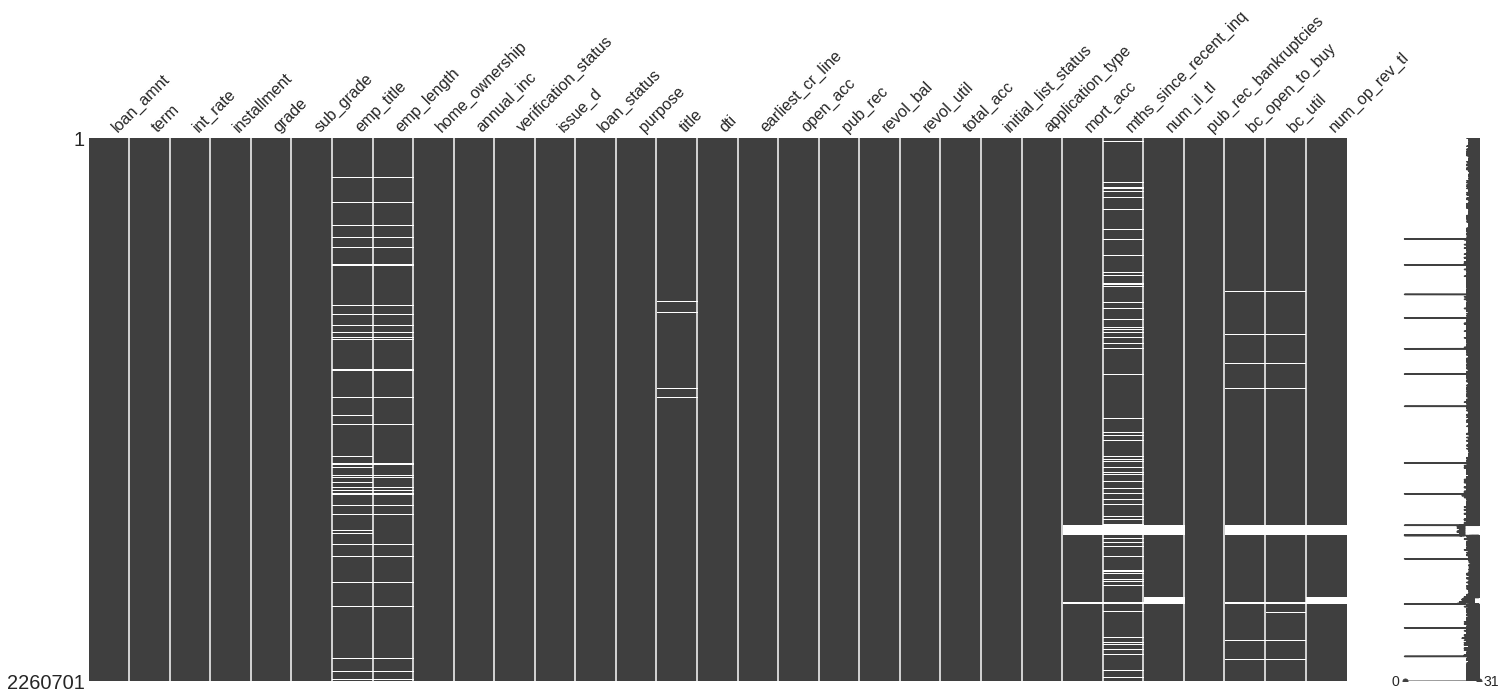

In [ ]:
missingno.matrix(accepted_short)

In [ ]:
var = list(accepted.columns)
var.sort()
print(var)

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', '



1. **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
3. **int_rate**: Interest Rate on the loan
4. **installment**: The monthly payment owed by the borrower if the loan originates.
5. **grade**: LC assigned loan grade
6. **sub_grade**: LC assigned loan subgrade
7. **emp_title**: The job title supplied by the Borrower when applying for the loan.
8. **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
10. **annual_inc**: The self-reported annual income provided by the borrower during registration.
11. **verification_status**: Indicates if income was verified by LC, not verified, or if the income source was verified
12. **issue_d**: The month which the loan was funded
13. **loan_status**: Current status of the loan
14. **purpose**: A category provided by the borrower for the loan request.
15. **title**: The loan title provided by the borrower
16. **dti**: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
17. **earliest_cr_line**: The month the borrower's earliest reported credit line was opened
18. **open_acc**: The number of open credit lines in the borrower's credit file.
19. **pub_rec**: Number of derogatory public records
20. **revol_bal**: Total credit revolving balance
21. **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. **total_acc**: The total number of credit lines currently in the borrower's credit file
23. **initial_list_status**: The initial listing status of the loan. Possible values are – W, F
24. **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. **mort_acc**: Number of mortgage accounts.
26. **mths_since_recent_inq**: Months since most recent inquiry
27. **num_il_tl**: Number of installment accounts
28. **pub_rec_bankruptcies**: Number of public record bankruptcies
29. **bc_open_to_buy**: Total open to buy on revolving bankcards
30. **bc_util**: Ratio of total current balance to high credit/credit limit for all bankcard accounts
31. **num_op_rev_tl**: Number of open revolving accounts



In [54]:
# accepted_short.info()

In [55]:
# accepted_short.isnull().sum()

In [ ]:
missing_data = pd.DataFrame({'total_missing': accepted_short.isnull().sum(), '%_missing': (accepted_short.isnull().sum()/2260701)*100})
missing_data

,total_missing,%_missing
loan_amnt,33,0.001460
term,33,0.001460
int_rate,33,0.001460
installment,33,0.001460
grade,33,0.001460
sub_grade,33,0.001460
emp_title,167002,7.387178
emp_length,146940,6.499754
home_ownership,33,0.001460
annual_inc,37,0.001637


In [1]:
accepted_short = accepted_short.dropna()
# accepted_short.info()

In [ ]:
missing_data = pd.DataFrame({'total_missing': accepted_short.isnull().sum()})
missing_data

,total_missing
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


### 3. Visualizing Basic Plots and Univariate + Bivariate Analysis
We perform Univariate analysis here for the dataset at hand.

#### 3.1 Box Plots for all the columns

We plot box plots to get an understanding of the outliers in this dataset. Along with getting an idea of the mean, interquartile range, range, and if possible standard deviation.

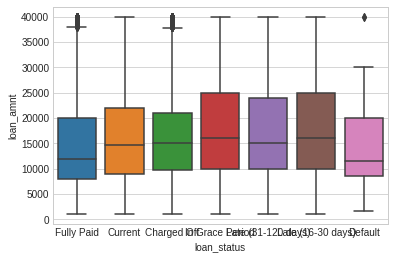

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=accepted_short)

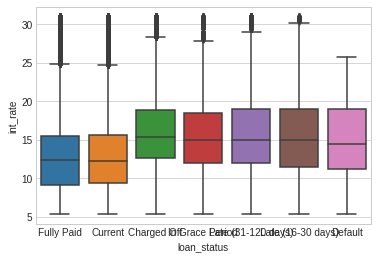

In [ ]:
sns.boxplot(x='loan_status', y='int_rate', data=accepted_short)

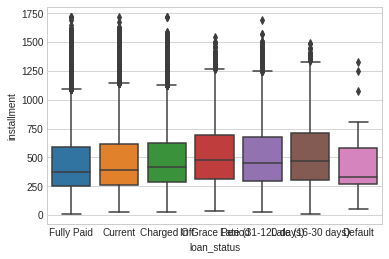

In [ ]:
sns.boxplot(x='loan_status', y='installment', data=accepted_short)

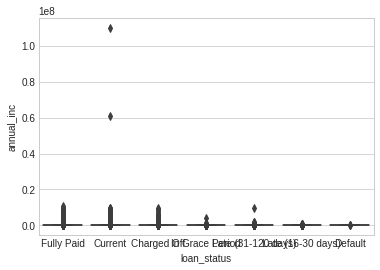

In [ ]:
sns.boxplot(x='loan_status', y='annual_inc', data=accepted_short)

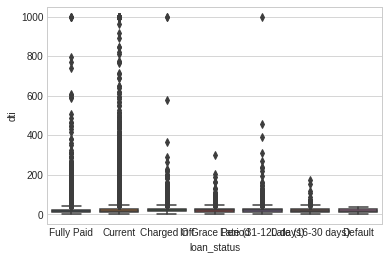

In [ ]:
sns.boxplot(x='loan_status', y='dti', data=accepted_short)

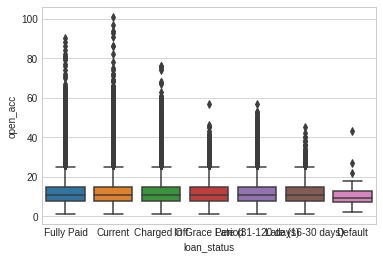

In [ ]:
sns.boxplot(x='loan_status', y='open_acc', data=accepted_short)

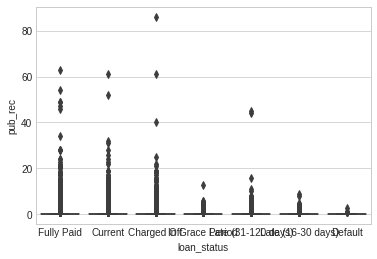

In [ ]:
sns.boxplot(x='loan_status', y='pub_rec', data=accepted_short)

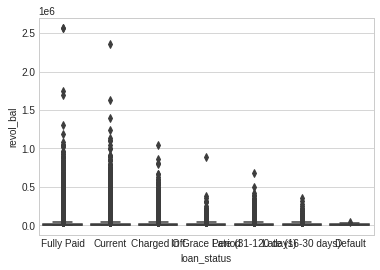

In [ ]:
sns.boxplot(x='loan_status', y='revol_bal', data=accepted_short)

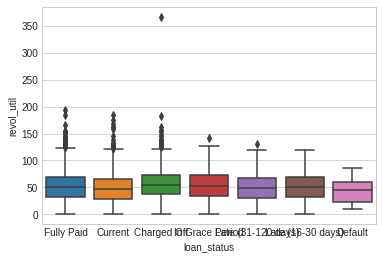

In [ ]:
sns.boxplot(x='loan_status', y='revol_util', data=accepted_short)

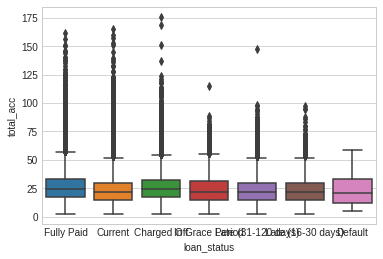

In [ ]:
sns.boxplot(x='loan_status', y='total_acc', data=accepted_short)

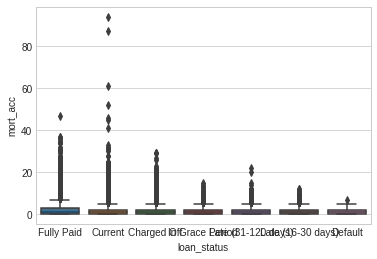

In [ ]:
sns.boxplot(x='loan_status', y='mort_acc', data=accepted_short)

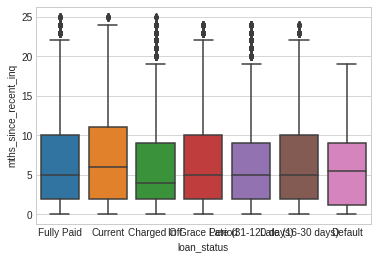

In [ ]:
sns.boxplot(x='loan_status', y='mths_since_recent_inq', data=accepted_short)

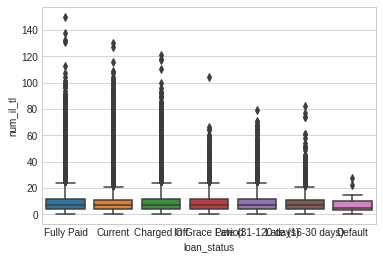

In [ ]:
sns.boxplot(x='loan_status', y='num_il_tl', data=accepted_short)

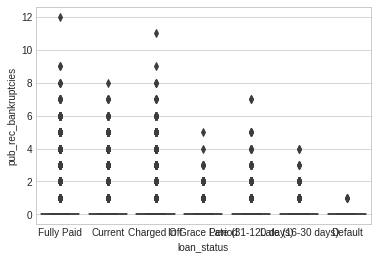

In [ ]:
sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=accepted_short)

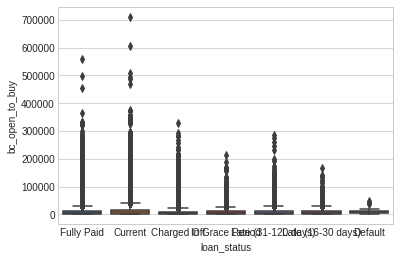

In [ ]:
sns.boxplot(x='loan_status', y='bc_open_to_buy', data=accepted_short)

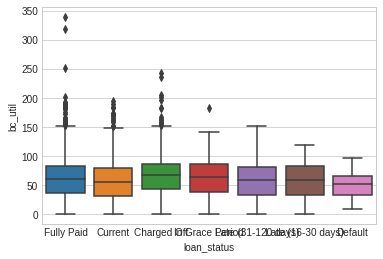

In [ ]:
sns.boxplot(x='loan_status', y='bc_util', data=accepted_short)

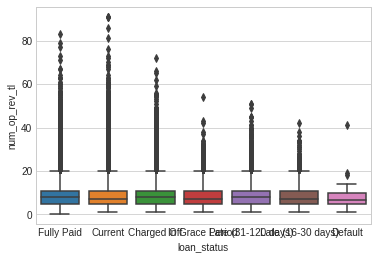

In [ ]:
sns.boxplot(x='loan_status', y='num_op_rev_tl', data=accepted_short)

#### 3.2 Loan Status Count

This plot will depict the count of the accounts on the basis of their loan status

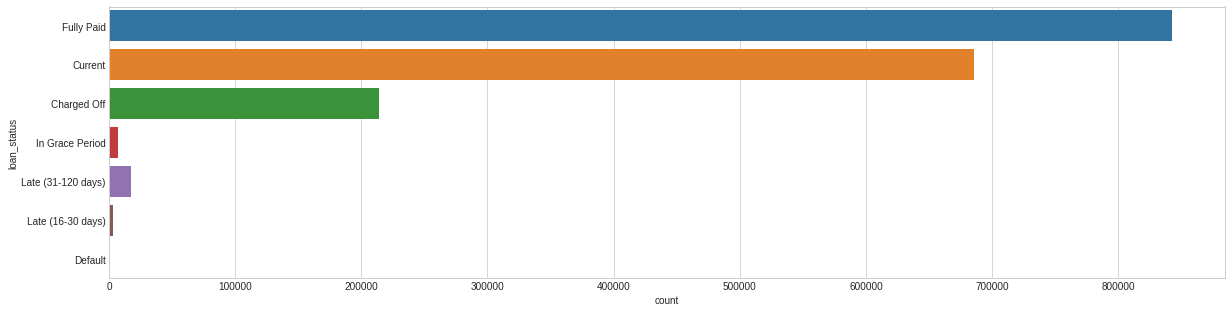

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='loan_status', data=accepted_short);

Fully paid are the highest followed by current and the charged off. Most of the loan accounts are either paid off or the payment is still in progress. 


#### 3.3 No. of Grades (Grade Count Plot)
A higher LC assigned loan grade implies the more likely a borrower would repay the loan. The acceptance rate is more distributed to candidates with a grade of A, B and C.



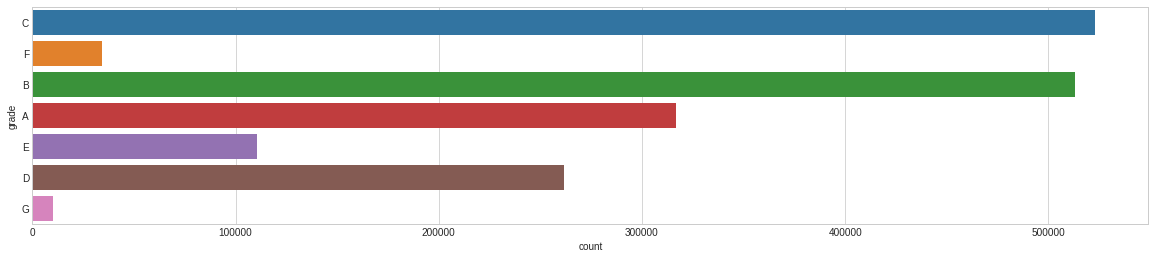

In [ ]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(y="grade", data=accepted_short)


#### 3.4 Installment vs Loan Status vs Count (Histplot)

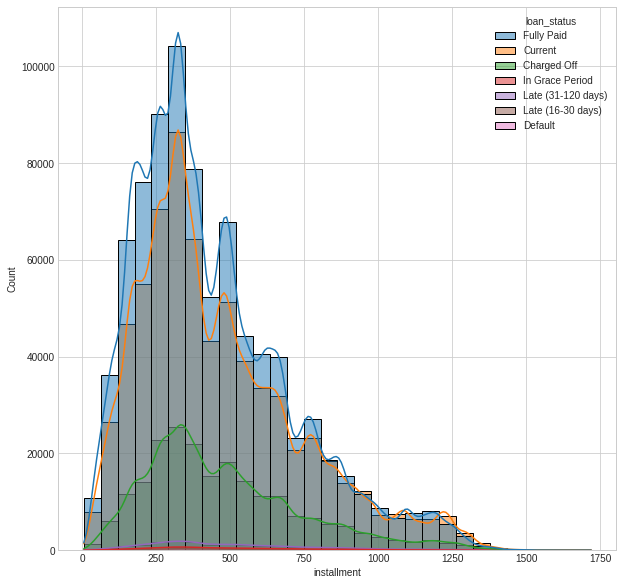

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(data=accepted_short, x="installment", bins=30, kde=True, hue="loan_status")

#### 3.5 Loan Status vs Other Attributes (CountPlot)
The below plots have 4 subplots where each certain significance

1. **Terms vs Loan Status** - Relation between how terms affected the loan status.
2. **Home Onwership vs Loan Status** - No significant difference between this comparision
3. **Verification Status vs Loan Status**
4. **Debt vs Loan Status** - Loan charged off significantly for debt consolidation


In [ ]:
accepted_short_bin = accepted_short.loc[(accepted_short["loan_status"] == "Fully Paid") | (accepted_short["loan_status"] == "Charged Off")]

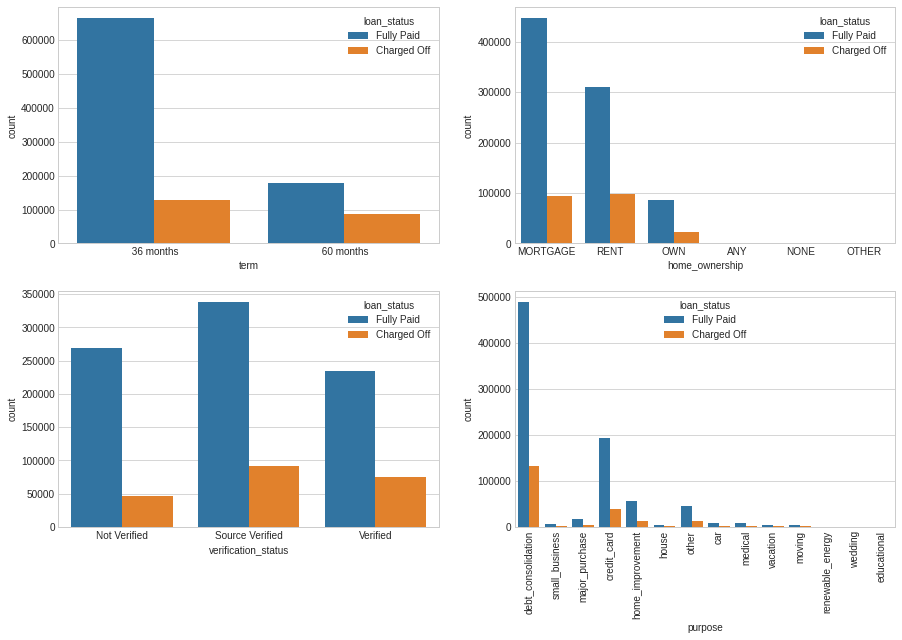

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=accepted_short_bin, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=accepted_short_bin, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=accepted_short_bin, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=accepted_short_bin, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#### 3.6 Grade vs Loan Status (Count Plot)
We create a count plot to get a better gist of the distribution of the grades across the Loan status for loan data.

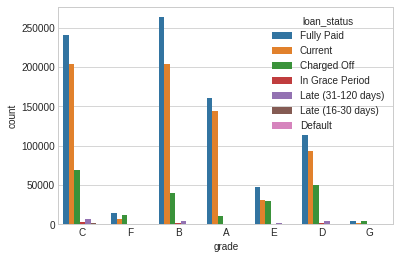

In [ ]:
sns.countplot(x='grade', hue='loan_status', data=accepted_short)

#### 3.7 Grade and Sub-grade (Gradient-based Count Plot)
This plot is something that we can use for getting to know how grades and subgrades have been distributed.

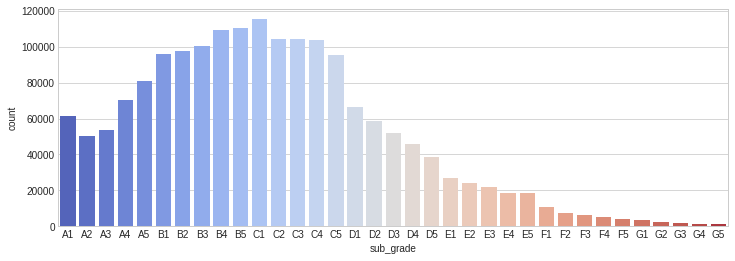

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(accepted_short['sub_grade'].unique())
sns.countplot(x= 'sub_grade', data=accepted_short, order=subgrade_order, palette='coolwarm')

This plot depicts the classes along with the above gradient-based countplot

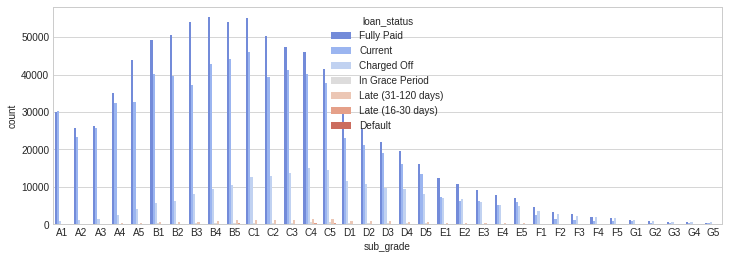

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(accepted_short['sub_grade'].unique())
sns.countplot(x= 'sub_grade', data=accepted_short, order=subgrade_order, palette='coolwarm', hue='loan_status')


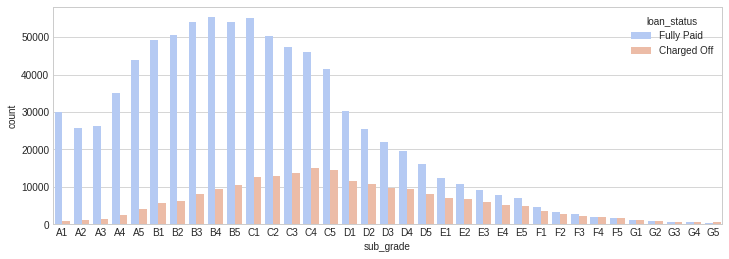

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(accepted_short_bin['sub_grade'].unique())
sns.countplot(x= 'sub_grade', data=accepted_short_bin, order=subgrade_order, palette='coolwarm', hue='loan_status')


##### 3.8a Interest Rate vs Number of Loan Applications

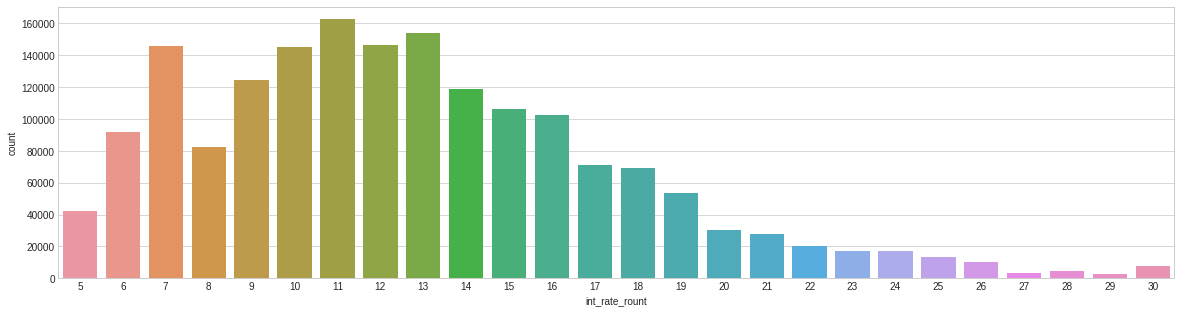

In [ ]:
accepted_short['int_rate_rount']=accepted_short['int_rate'].astype(int)
fig = plt.figure(figsize=(20,5))
int_rate_graph=sns.countplot(accepted_short["int_rate_rount"])


##### 3.8b Employment vs Loan Status (Countplot)
Candidates with over 10+ years of experience tend to have lower fully paid to charged off ratio


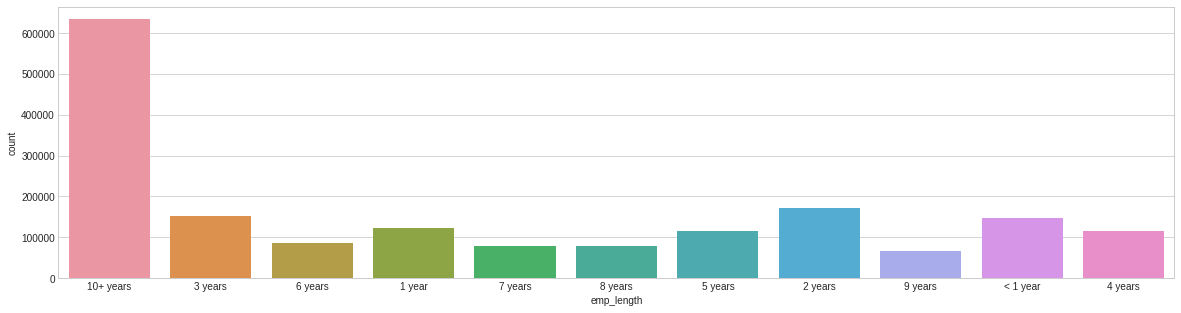

In [ ]:
fig = plt.figure(figsize=(20,5))
int_rate_graph=sns.countplot(accepted_short["emp_length"])

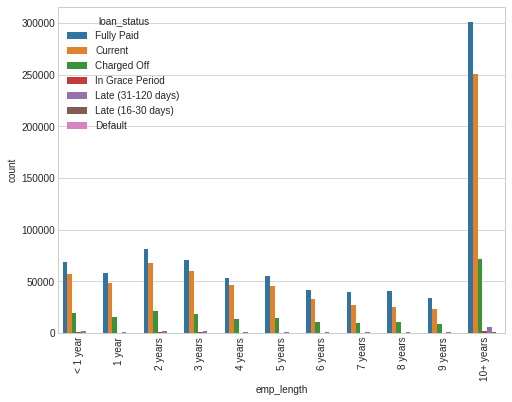

In [ ]:
plt.figure(figsize=(8, 6))
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=accepted_short, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


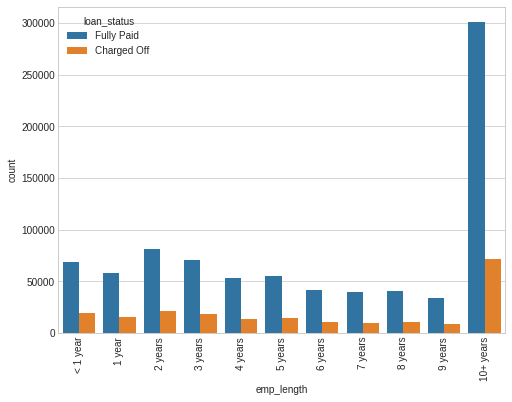

In [ ]:
plt.figure(figsize=(8, 6))
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=accepted_short_bin, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


#### 3.9 Employee Title vs Loans Accepted
* Maximum number of loans are accepted for professions with a more stable jobs (according to the society) like Teacher, Nurse, Owner and etc..


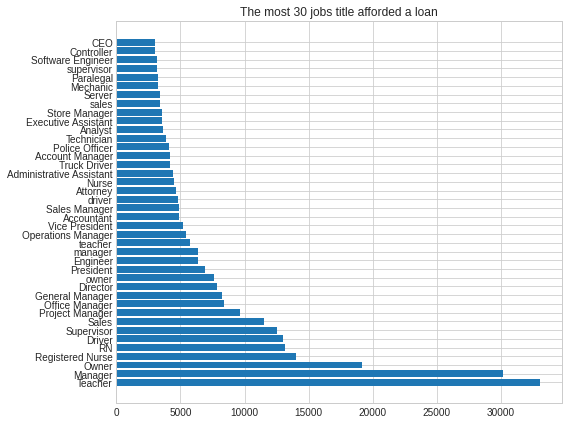

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(accepted_short.emp_title.value_counts()[:40].index, accepted_short.emp_title.value_counts()[:40])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

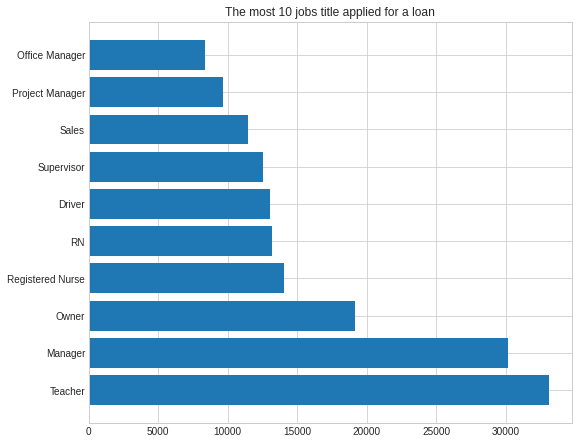

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.barh(accepted_short.emp_title.value_counts()[:10].index, accepted_short.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title applied for a loan")
plt.tight_layout()


#### 3.10 Application Type vs Loan Status¶
* This plot focuses more on loan status in accordance with the application type


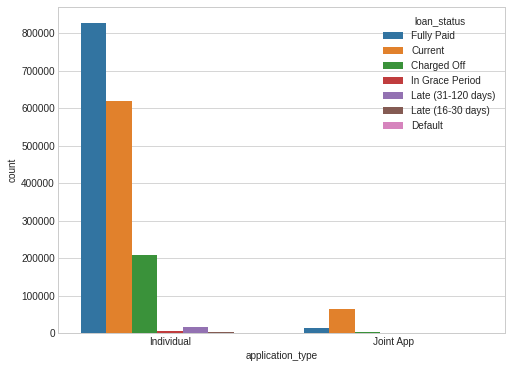

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="application_type", data=accepted_short, hue="loan_status")


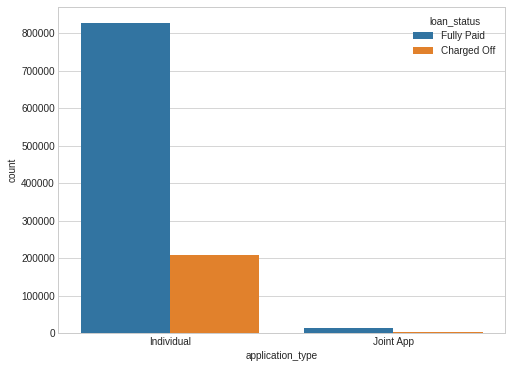

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="application_type", data=accepted_short_bin, hue="loan_status")


#### 3.11 Bivariate analysis using Area Plot 
##### 3.11.1 Sub-grade vs Loan Status
* Here, we start to analyze the variables in pairs. So, the first pair of variables that we take is Sub grade and Loan Status.

In [ ]:
analyse_sub_grade = accepted_short.groupby(['sub_grade','loan_status'])['loan_status'].count()
analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
analyse_sub_grade

sub_grade  loan_status       
A1         Charged Off            1.606856
           Current               49.275292
           Default                0.001623
           Fully Paid            48.801350
           In Grace Period        0.103878
           Late (16-30 days)      0.047070
           Late (31-120 days)     0.163932
A2         Charged Off            2.349901
           Current               46.292247
           Fully Paid            50.886680
           In Grace Period        0.109344
           Late (16-30 days)      0.073559
           Late (31-120 days)     0.288270
A3         Charged Off            2.631187
           Current               48.026610
           Fully Paid            48.781306
           In Grace Period        0.147212
           Late (16-30 days)      0.068948
           Late (31-120 days)     0.344738
A4         Charged Off            3.533378
           Current               46.013570
           Default                0.001422
           Fully Paid   

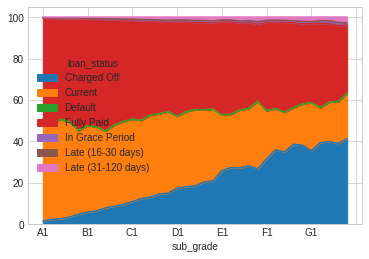

In [ ]:
analyse_sub_grade = analyse_sub_grade.unstack()
analyse_sub_grade.plot.area()

In [ ]:
analyse_sub_grade = accepted_short_bin.groupby(['sub_grade','loan_status'])['loan_status'].count()
analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
analyse_sub_grade


sub_grade  loan_status
A1         Charged Off     3.187687
           Fully Paid     96.812313
A2         Charged Off     4.414071
           Fully Paid     95.585929
A3         Charged Off     5.117796
           Fully Paid     94.882204
A4         Charged Off     6.623647
           Fully Paid     93.376353
A5         Charged Off     8.319606
           Fully Paid     91.680394
B1         Charged Off    10.170172
           Fully Paid     89.829828
B2         Charged Off    11.073861
           Fully Paid     88.926139
B3         Charged Off    12.826458
           Fully Paid     87.173542
B4         Charged Off    14.654614
           Fully Paid     85.345386
B5         Charged Off    16.428925
           Fully Paid     83.571075
C1         Charged Off    18.662191
           Fully Paid     81.337809
C2         Charged Off    20.530965
           Fully Paid     79.469035
C3         Charged Off    22.370421
           Fully Paid     77.629579
C4         Charged Off    24.701846
     

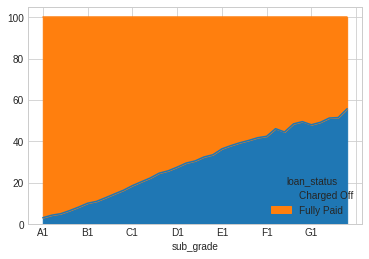

In [ ]:
analyse_sub_grade = analyse_sub_grade.unstack()
analyse_sub_grade.plot.area()

##### 3.11.2 Annual Income vs Loan Status

In [ ]:
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
labels = ['30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k']
loans = accepted_short
loans['binned'] = pd.cut(loans['annual_inc'], bins=bins, labels=labels)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,mths_since_recent_inq,num_il_tl,pub_rec_bankruptcies,bc_open_to_buy,bc_util,num_op_rev_tl,int_rate_rount,binned
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,4.0,3.0,0.0,1506.0,37.2,4.0,13,50-70k
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,6.0,0.0,57830.0,27.1,20.0,11,50-70k
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,1.0,10.0,0.0,4567.0,77.5,7.0,22,90-110k
6,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,14.67,Jun-1990,12.0,0.0,87329.0,84.5,27.0,f,Individual,4.0,10.0,7.0,0.0,0.0,102.9,9.0,9,NaN
7,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,17.61,Feb-1999,8.0,0.0,826.0,5.7,15.0,w,Individual,3.0,8.0,9.0,0.0,13674.0,5.7,3.0,8,70-90k


In [ ]:
analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()
analyse_income

binned    loan_status       
30-50k    Charged Off            57566
          Current               148515
          Default                    8
          Fully Paid            192292
          In Grace Period         1462
          Late (16-30 days)        678
          Late (31-120 days)      4055
50-70k    Charged Off            57305
          Current               165806
          Default                    6
          Fully Paid            211989
          In Grace Period         1656
          Late (16-30 days)        855
          Late (31-120 days)      4457
70-90k    Charged Off            38072
          Current               125767
          Default                    6
          Fully Paid            157591
          In Grace Period         1310
          Late (16-30 days)        661
          Late (31-120 days)      3157
90-110k   Charged Off            20752
          Current                78615
          Default                    3
          Fully Paid             96

In [ ]:
analyse_income = analyse_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_income

binned    loan_status       
30-50k    Charged Off           14.228723
          Current               36.708801
          Default                0.001977
          Fully Paid            47.529265
          In Grace Period        0.361366
          Late (16-30 days)      0.167583
          Late (31-120 days)     1.002284
50-70k    Charged Off           12.962762
          Current               37.506390
          Default                0.001357
          Fully Paid            47.953284
          In Grace Period        0.374598
          Late (16-30 days)      0.193407
          Late (31-120 days)     1.008202
70-90k    Charged Off           11.658358
          Current               38.512206
          Default                0.001837
          Fully Paid            48.257309
          In Grace Period        0.401146
          Late (16-30 days)      0.202411
          Late (31-120 days)     0.966732
90-110k   Charged Off           10.404456
          Current               39.415301
     

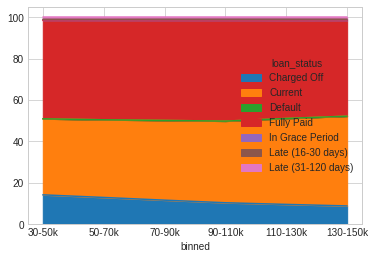

In [ ]:
analyse_income = analyse_income.unstack()
analyse_income
analyse_income.plot.area()

In [ ]:
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
labels = ['30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k']
loans = accepted_short_bin
loans['binned'] = pd.cut(loans['annual_inc'], bins=bins, labels=labels)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,mths_since_recent_inq,num_il_tl,pub_rec_bankruptcies,bc_open_to_buy,bc_util,num_op_rev_tl,binned
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,4.0,3.0,0.0,1506.0,37.2,4.0,50-70k
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,6.0,0.0,57830.0,27.1,20.0,50-70k
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,1.0,10.0,0.0,4567.0,77.5,7.0,90-110k
6,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,14.67,Jun-1990,12.0,0.0,87329.0,84.5,27.0,f,Individual,4.0,10.0,7.0,0.0,0.0,102.9,9.0,NaN
7,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,17.61,Feb-1999,8.0,0.0,826.0,5.7,15.0,w,Individual,3.0,8.0,9.0,0.0,13674.0,5.7,3.0,70-90k


In [ ]:
analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()
analyse_income

binned    loan_status
30-50k    Charged Off     57566
          Fully Paid     192292
50-70k    Charged Off     57305
          Fully Paid     211989
70-90k    Charged Off     38072
          Fully Paid     157591
90-110k   Charged Off     20752
          Fully Paid      96971
110-130k  Charged Off     11162
          Fully Paid      54898
130-150k  Charged Off      6198
          Fully Paid      32255
Name: loan_status, dtype: int64

In [ ]:
analyse_income = analyse_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_income

binned    loan_status
30-50k    Charged Off    23.039486
          Fully Paid     76.960514
50-70k    Charged Off    21.279717
          Fully Paid     78.720283
70-90k    Charged Off    19.457946
          Fully Paid     80.542054
90-110k   Charged Off    17.627821
          Fully Paid     82.372179
110-130k  Charged Off    16.896761
          Fully Paid     83.103239
130-150k  Charged Off    16.118378
          Fully Paid     83.881622
Name: loan_status, dtype: float64

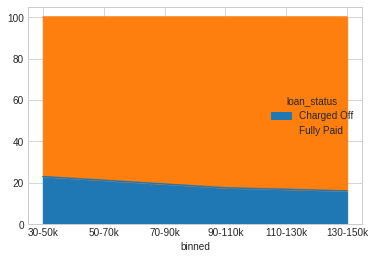

In [ ]:
analyse_income = analyse_income.unstack()
analyse_income
analyse_income.plot.area()

##### 3.11.3 Emp Length vs Loan Status

In [ ]:
analyse_emp_length = loans.groupby(['emp_length','loan_status'])['loan_status'].count()
analyse_emp_length = analyse_emp_length.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_emp_length

emp_length  loan_status
1 year      Charged Off    21.248344
            Fully Paid     78.751656
10+ years   Charged Off    19.296361
            Fully Paid     80.703639
2 years     Charged Off    20.625471
            Fully Paid     79.374529
3 years     Charged Off    20.832684
            Fully Paid     79.167316
4 years     Charged Off    20.602970
            Fully Paid     79.397030
5 years     Charged Off    20.485659
            Fully Paid     79.514341
6 years     Charged Off    20.190410
            Fully Paid     79.809590
7 years     Charged Off    20.161647
            Fully Paid     79.838353
8 years     Charged Off    20.689520
            Fully Paid     79.310480
9 years     Charged Off    20.678276
            Fully Paid     79.321724
< 1 year    Charged Off    21.543623
            Fully Paid     78.456377
Name: loan_status, dtype: float64

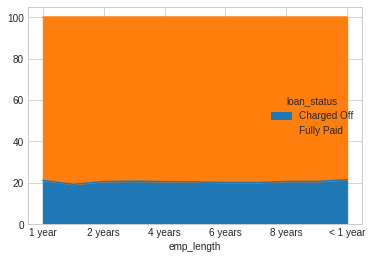

In [ ]:
analyse_emp_length = analyse_emp_length.unstack()
analyse_emp_length.plot.area()

##### 3.11.4 DTI vs Loan Status

In [ ]:
analyse_dti = loans.groupby(['dti','loan_status'])['loan_status'].count()
loans['dti'].unique()

array([ 5.91, 16.06, 25.37, ..., 74.92, 65.27, 52.46])

In [ ]:
binsdti = [1, 10, 20, 30, 40, 50]
labelsdti = ['1-10', '10-20', '20-30','30-40','40-50']
loans['binneddti'] = pd.cut(loans['dti'], bins=binsdti, labels=labelsdti)


analyse_dti = loans.groupby(['binneddti','loan_status'])['loan_status'].count()
analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_dti

binneddti  loan_status
1-10       Charged Off    15.122880
           Fully Paid     84.877120
10-20      Charged Off    18.025977
           Fully Paid     81.974023
20-30      Charged Off    23.261854
           Fully Paid     76.738146
30-40      Charged Off    29.027133
           Fully Paid     70.972867
40-50      Charged Off    30.909695
           Fully Paid     69.090305
Name: loan_status, dtype: float64

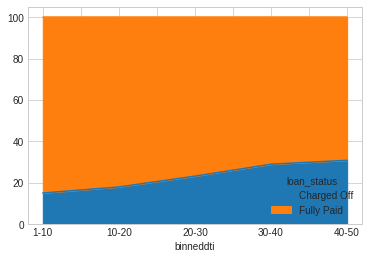

In [ ]:
analyse_dti = analyse_dti.unstack()
analyse_dti.plot.area()

#### 3.12 Dealing with Outliers
We create few plots and the plots in 3.1 can be of help to us over here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f340a69c650>,
      dtype=object)

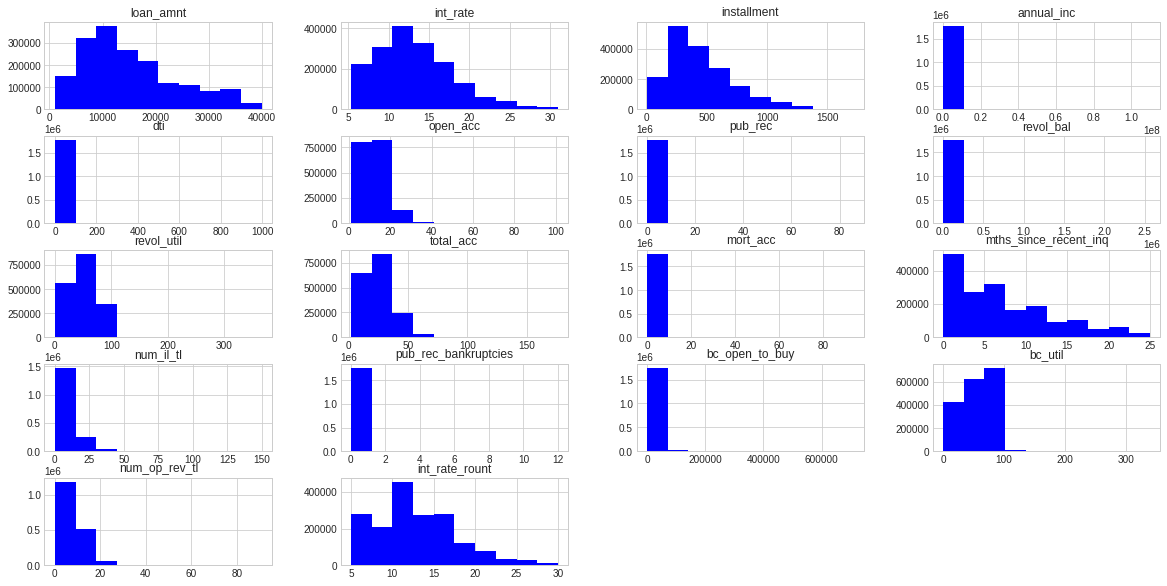

In [ ]:
accepted_short.hist(bins = 10, figsize = (20,10), color = 'b')

In [ ]:
numeric = accepted_short.select_dtypes(exclude=['object']).copy()
numeric = numeric.drop(["binned"], axis = 1)

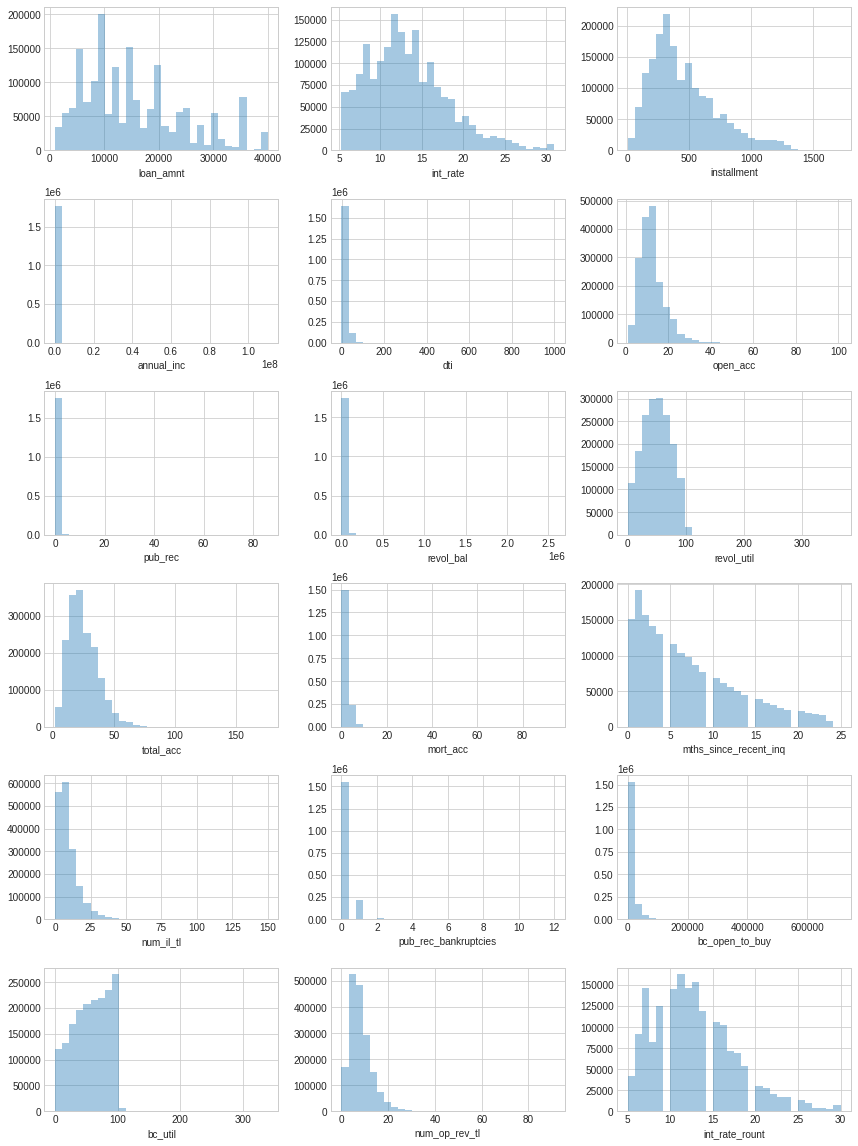

In [ ]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric):
    plt.subplot(6,3,index+1)
    sns.distplot(numeric.loc[:,col].dropna(), kde=False,bins=30)
fig.tight_layout(pad=1.0)

#### 3.13 Correlations between attributes (HeatMap)
The below heatmap shows a correlation between attributes. A few key observations from the heatmap is that:

1. installment and loan amount are heavily correlated, which implies greater the loan amount, higher the installments and vice versa.
2. total_acc and open_acc are correlated
3. publci_rec_bankruptcies and public_rec are correlated


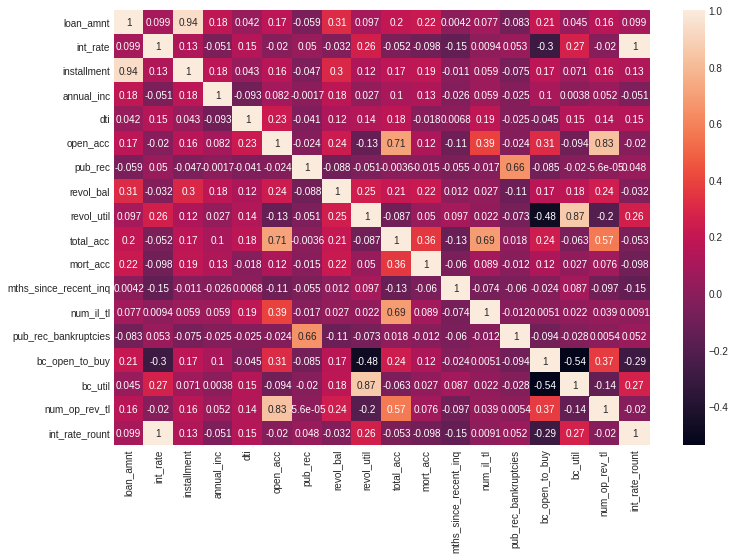

In [ ]:
fig= plt.figure(figsize=(12, 8))
sns.heatmap(accepted_short.corr(), annot=True)

### 4. Preparing Data for Modelling

In [ ]:
import math
import datetime
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model, preprocessing  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm


In [ ]:
accepted_short.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,mths_since_recent_inq,num_il_tl,pub_rec_bankruptcies,bc_open_to_buy,bc_util,num_op_rev_tl
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,4.0,3.0,0.0,1506.0,37.2,4.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,6.0,0.0,57830.0,27.1,20.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,10.0,6.0,0.0,2737.0,55.9,4.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,17.06,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,NaN,2.0,0.0,54962.0,12.1,10.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,1.0,10.0,0.0,4567.0,77.5,7.0


In [ ]:
accepted_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 31 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   loan_amnt              float64
 1   term                   object 
 2   int_rate               float64
 3   installment            float64
 4   grade                  object 
 5   sub_grade              object 
 6   emp_title              object 
 7   emp_length             object 
 8   home_ownership         object 
 9   annual_inc             float64
 10  verification_status    object 
 11  issue_d                object 
 12  loan_status            object 
 13  purpose                object 
 14  title                  object 
 15  dti                    float64
 16  earliest_cr_line       object 
 17  open_acc               float64
 18  pub_rec                float64
 19  revol_bal              float64
 20  revol_util             float64
 21  total_acc              float64
 22  initial_list_statu

In [ ]:
le = preprocessing.LabelEncoder()

accepted_short["term"] = le.fit_transform(accepted_short["term"])
accepted_short["term"].value_counts()

accepted_short["grade"] = le.fit_transform(accepted_short["grade"])
accepted_short["grade"].value_counts()

accepted_short["sub_grade"] = le.fit_transform(accepted_short["sub_grade"])
accepted_short["sub_grade"].value_counts()

accepted_short["emp_title"] = le.fit_transform(accepted_short["emp_title"])
accepted_short["emp_title"].value_counts()

accepted_short["emp_length"] = le.fit_transform(accepted_short["emp_length"])
accepted_short["emp_length"].value_counts()

accepted_short["home_ownership"] = le.fit_transform(accepted_short["home_ownership"])
accepted_short["home_ownership"].value_counts()

accepted_short["verification_status"] = le.fit_transform(accepted_short["verification_status"])
accepted_short["verification_status"].value_counts()

accepted_short["issue_d"] = le.fit_transform(accepted_short["issue_d"])
accepted_short["issue_d"].value_counts()

accepted_short["purpose"] = le.fit_transform(accepted_short["purpose"])
accepted_short["purpose"].value_counts()

accepted_short["title"] = le.fit_transform(accepted_short["title"])
accepted_short["title"].value_counts()

accepted_short["earliest_cr_line"] = le.fit_transform(accepted_short["earliest_cr_line"])
accepted_short["earliest_cr_line"].value_counts()

accepted_short["initial_list_status"] = le.fit_transform(accepted_short["initial_list_status"])
accepted_short["initial_list_status"].value_counts()

accepted_short["application_type"] = le.fit_transform(accepted_short["application_type"])
accepted_short["application_type"].value_counts()


0    2139958
1     120710
2         33
Name: application_type, dtype: int64

In [ ]:
accepted_short["loan_status"].value_counts()

In [ ]:
accepted_short = accepted_short.loc[accepted_short["loan_status"].isin(["Fully Paid", "Current", "Charged Off"])]

In [ ]:
accepted_short["loan_status"].value_counts()

In [ ]:
# loan_status_to_int = {'Current': 1, 'Fully Paid': 2, 'Charged Off': 0}
# accepted_short['loan_status']= accepted_short['loan_status'].map(loan_status_to_int).astype(int)
# accepted_short['loan_status'].value_counts()

ohe = preprocessing.OneHotEncoder(handle_unknown = "ignore")

accepted_short["loan_status"] = le.fit_transform(accepted_short["loan_status"])
print(accepted_short["loan_status"].value_counts())

y = pd.DataFrame(ohe.fit_transform(accepted_short[["loan_status"]]).toarray()).astype(int)
print(y)

In [ ]:
X = accepted_short.drop(["loan_status"], axis = 1)
y1 = accepted_short["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.25, random_state = 42, stratify=y1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1667720, 30), (555907, 30), (1667720, 3), (555907, 3))

((1667720, 30), (555907, 30), (1667720, 3), (555907, 3))

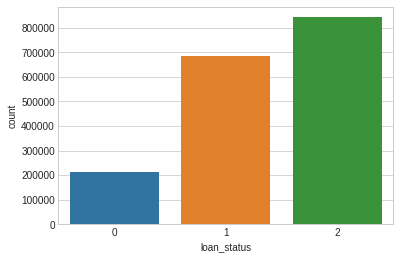

In [ ]:
sns.countplot(x=y_train1,data=y_train1)

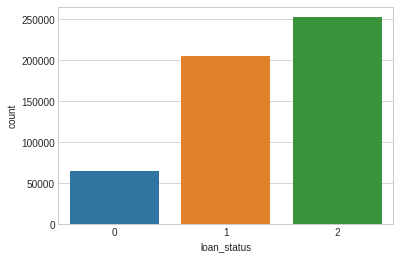

In [ ]:
sns.countplot(x=y_test1,data=y_test1)

Here, we normalize the integer values so that they lie in the range between 0 and 1. This is done using MinMaxScaler.

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler1 = preprocessing.MinMaxScaler()

X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

### 5. Fitting to some of the models

#### 5.1 Logistic Regression

In [ ]:
model_lr = linear_model.LogisticRegression(penalty="l2", C= 0.01, solver = "newton-cg")
model_lr.fit(X_train1, y_train1)

pred_lr = model_lr.predict(X_test1)

accuracy_lr = accuracy_score(pred_lr, y_test1)*100
print('Accuracy of Regularized Logistic Regression is: {:.2f}'.format(accuracy_lr))
print(classification_report(y_test1, pred_lr))

Accuracy of Regularized Logistic Regression is: 60.44
              precision    recall  f1-score   support

           0       0.42      0.06      0.11     64604
           1       0.62      0.59      0.60    205385
           2       0.60      0.76      0.67    252604

    accuracy                           0.60    522593
   macro avg       0.55      0.47      0.46    522593
weighted avg       0.59      0.60      0.57    522593



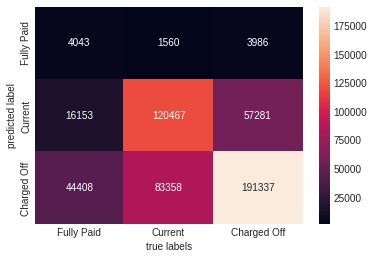

In [ ]:
mat = confusion_matrix(y_test1, pred_lr)

sns.heatmap(mat.T, 
            annot=True, 
            fmt = "d", 
            xticklabels = ["Fully Paid", "Current", "Charged Off"],
            yticklabels= ["Fully Paid", "Current", "Charged Off"]
           )

plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

#### 5.2 Using Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(pred_dt, y_test)*100
print('Accuracy of Decision Tree Regression is: {:.2f}'.format(accuracy_dt))

print(classification_report(y_test, pred_dt))


Accuracy of Decision Tree Regression is: 60.96
              precision    recall  f1-score   support

           0       0.21      0.22      0.21     64604
           1       0.69      0.68      0.68    205385
           2       0.66      0.65      0.66    252604

    accuracy                           0.61    522593
   macro avg       0.52      0.52      0.52    522593
weighted avg       0.61      0.61      0.61    522593



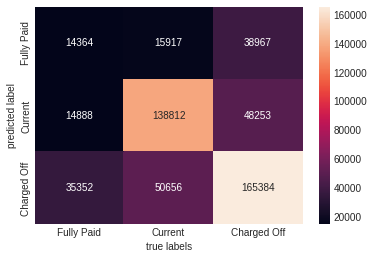

In [ ]:
mat = confusion_matrix(y_test, pred_dt)

sns.heatmap(mat.T, 
            annot=True, 
            fmt = "d", 
            xticklabels = ["Fully Paid", "Current", "Charged Off"],
            yticklabels= ["Fully Paid", "Current", "Charged Off"]
           )

plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

#### 5.3 Using Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(max_depth = 6)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

accuracy= accuracy_score(pred_rf,y_test)*100
print('Accuracy of RandomForestClassifier: {:.2f}'.format(accuracy))

print(classification_report(y_test, pred_rf))


Accuracy of RandomForestClassifier: 59.13
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     64604
           1       0.64      0.47      0.54    205385
           2       0.57      0.84      0.68    252604

    accuracy                           0.59    522593
   macro avg       0.40      0.44      0.41    522593
weighted avg       0.53      0.59      0.54    522593



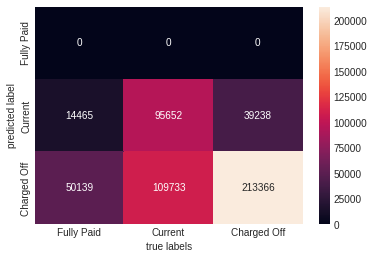

In [ ]:
mat = confusion_matrix(y_test, pred_rf)

sns.heatmap(mat.T, 
            annot=True, 
            fmt = "d", 
            xticklabels = ["Fully Paid", "Current", "Charged Off"],
            yticklabels= ["Fully Paid", "Current", "Charged Off"]
           )

plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

Although, it hasn't been done in this notebook. But, the following can be done for optimizing the accuracy of the classifiers. 
1. Hyperparameter Tuning
2. Selecting the best parameters using GridSearchCV
3. Selecting the best parameters using Genetic Algorithm
4. Training a Multi-layer Perceptron for this data.

### 6. Conclusion
The following conclusion can be drawn from the work done above. 
1. The loan_status for majority of the application is either `current` or `fully_paid` according to the Histogram in 3.2.
2. There is no specific pattern to box plots and a lot of outliers can be seen from the box plots (from 3.1; like in the case of `bc_open_to_buy` and `dti`) and the individual historgrams (from 3.12).
3. `Installment` and `loan amount` are highly correlated with a correlation of +0.94. This suggests that with an increase in the loan amount, the installments also increased which is normal.
4. `Revol_util` and `bc_util` are also highly correlated with a correlation score of 0.87. This suggests that the ratio of total current balance to high credit for all bankcard account increased with an increase in the amount of credit borrower was using relative to all revolving credits.
5. The `interest rate` mostly lied in the range of (7, 14) and curves down for higher and lower values forming a right skewed bell curve (as depicted in 3.8a)
6. Join applications were introduced relatively recently as these have lower number of Fully-paid loans (as depicted in 3.10) 
7. A majority of loans were accepted from teachers, managers, and owners (as in 3.9)
8. Candidates with over 10+ years of experience tend to have lower fully paid to charged off ratio (as depicted in 3.8b)
9. Less amount of loans were sanctioned for a `term` of 60 months. Either due to this scheme coming recently or due to the less amount of loans sanctioned for this term overall (as depicted in 3.5) 
10. Most of the Lender Club people were graded amongst B and C grades for loan sanctioning (as depicted in 3.6 and 3.7)